# Red Wine Quality Predicition

## 1.Business Problem

### 1.1 Description
The datasets are related to red wine of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).



### 1.2 Sources
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## 2.Machine Learning Problem

### 2.1 Data
#### 2.1.1 Data Overviews
Contain one files 
* <b>weight-height.csv</b>-containing 1599 data points an 12 features</br>

#### Attribute-information
* fixed acidity 
* volatile acidity 
* citric acid 
* residual sugar 
* chlorides 
* free sulfur dioxide 
* total sulfur dioxide 
* density 
* pH 
* sulphates 
* alcohol 
* Output variable (based on sensory data): 
* quality (score between 0 and 10) 

### 2.2 Mapping the real-world problem to a Machine Learning Problem
#### 2.2.1 Type of Machine Learning Problem
Classification Problem predit Wine is good quality or bad Quality

#### 2.2.2 Performance metric
F1-score

## 3.Machine Learning Models

### 3.1. EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
data=pd.read_csv("winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print(data.shape)
print(data.isnull().values.any())

(1599, 12)
False


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


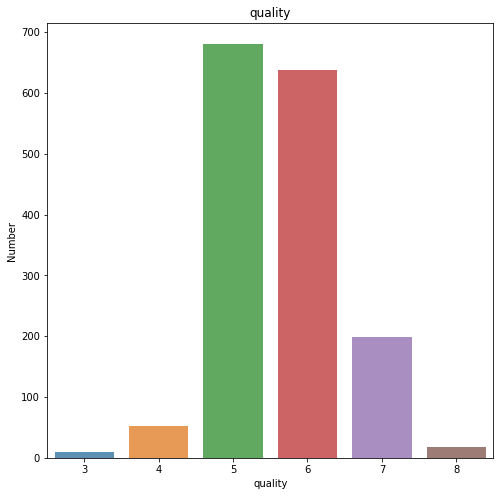

In [9]:
quality=data['quality'].value_counts()
print(quality)
plt.figure(figsize=(8,8))
sns.barplot(quality.index, quality.values, alpha=0.8)
plt.title('quality')
plt.ylabel('Number')
plt.xlabel('quality')
plt.show()

In [10]:
print('Original Categories:')
print(data['quality'].value_counts())

print( '\nModified Categories:')
data['quality'] = data['quality'].replace({3:'Not Good',
                                           4:'Not Good',
                                           5:'Not Good',
                                           6:'Not Good',
                                           7:'Good',
                                           8:'Good'})
print(data['quality'].value_counts())

Original Categories:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Modified Categories:
Not Good    1382
Good         217
Name: quality, dtype: int64


In [11]:
data['quality']=data['quality'].map({'Not Good':0,'Good':1})

In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 3.2. Train and Test Split(80:20)

In [14]:
y=data['quality']
data.drop(['quality'],axis=1,inplace=True)

In [15]:
train,test,y_train,y_test=train_test_split(data,y,test_size=0.2,shuffle=True)

In [16]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [22]:
from collections import Counter
print(Counter(y_train).keys())
print(Counter(y_train).values())

dict_keys([0, 1])
dict_values([1112, 167])


In [23]:
from collections import Counter
print(Counter(y_test).keys())
print(Counter(y_test).values())

dict_keys([0, 1])
dict_values([270, 50])


## 3.3. Logistic Regression

### 3.3.1 Hypermeter Turning

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.0s finished


Best HyperParameter:  {'C': 2000}
0.8594174629561143


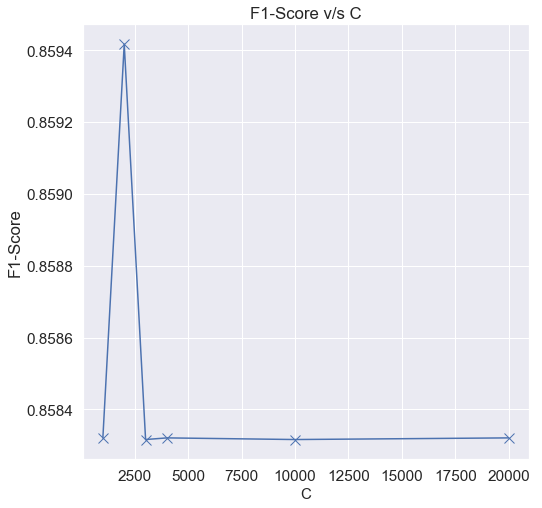

In [41]:
LR = LogisticRegression(penalty='l1')
C_value=[1000,2000,3000,4000,10000,20000]
C = [{'C': C_value}]
gsv = GridSearchCV(LR,C,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['C']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)

plt.xlabel("C",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s C')
plt.plot(C_value,x,marker='x',markerfacecolor='red',markersize=10)
plt.show()

### 3.3.2 Logistic Regression using optimal C

Accuracy on test set: 87.188%
Precision on test set: 0.791
Recall on test set: 0.647
F1-Score on test set: 0.683


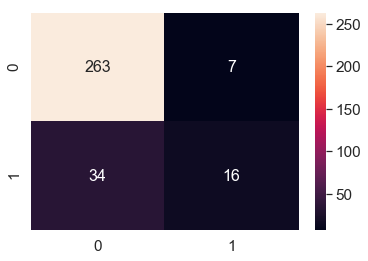

In [42]:
LR= LogisticRegression(penalty='l1',C=2000)
LR.fit(train,y_train)
y_pred =LR.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 3.4. Support Vector Machine RBF Kernel

### 3.4.1 Hypermeter Turning

Best HyperParameter:  {'C': 100, 'gamma': 0.5}
0.874060433947711


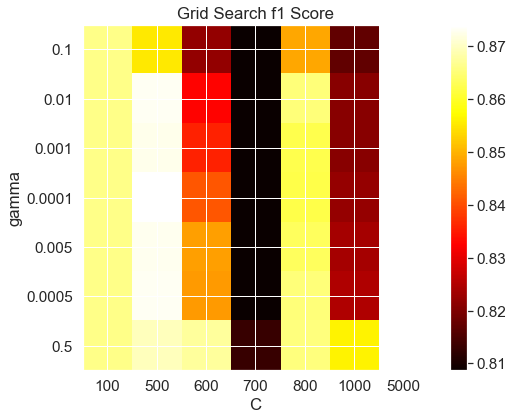

In [45]:
C=[100,500,600,700,800,1000,5000]
gamma=[0.1,0.01,0.001, 0.0001,0.005,0.0005,0.5]
tuned_parameters = [{'C':C,'gamma':gamma}]
sv = SVC(kernel='rbf')
gsv = GridSearchCV(sv, tuned_parameters, scoring = 'f1_weighted', cv=5)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

scores = gsv.cv_results_['mean_test_score'].reshape(len(C),len(gamma))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C)), C)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search f1 Score')
plt.show()

### 3.4.2 SVM using optimal C and Gamma

Accuracy on test set: 88.438%
Precision on test set: 0.882
Recall on test set: 0.300
F1-Score on test set: 0.448


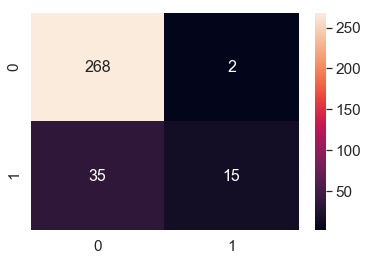

In [48]:
SV= SVC(kernel='rbf',C=100,gamma=0.5)
SV.fit(train,y_train)
y_pred =SV.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## 3.5. Random Forest

### 3.5.1 Hypermeter Turning

Fitting 5 folds for each of 272 candidates, totalling 1360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 1360 out of 1360 | elapsed:   23.8s finished


Best HyperParameter:  {'max_depth': 110, 'n_estimators': 12}
0.9005597744347429


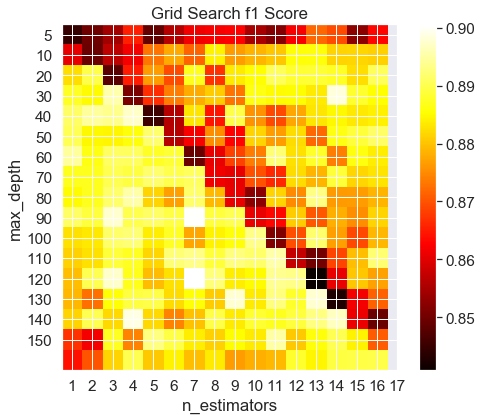

In [37]:
nEstimator = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
depth = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search f1 Score')
plt.show()

### 3.5.2 RandomForest using optimal n_estimators & max_depth

Accuracy on test set: 91.250%
Precision on test set: 0.904
Recall on test set: 0.744
F1-Score on test set: 0.796


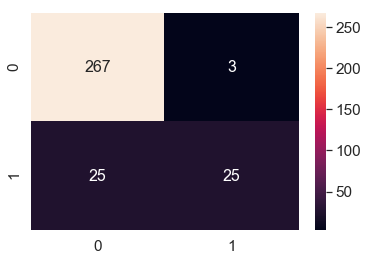

In [38]:
RF= RandomForestClassifier(n_estimators=12,max_depth=110)
RF.fit(train,y_train)
y_pred =RF.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### 4.Final Conclusion

|MODELS|Accuracy|F1Score|
|------|--------|-------|
|LR|87.188%|0.683|
|SVM|88.438%|0.448|
|RF|91.250%|0.796|